# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

Que 1 : Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

Answer: Using Graphical Method first to check if distribution is normal

In [1]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


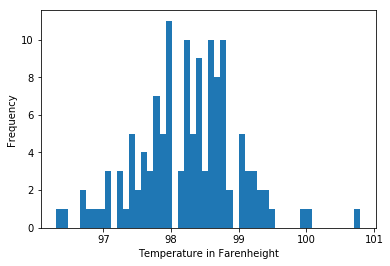

In [21]:
# Your work here.
_ = plt.hist(df['temperature'], bins= 50)
_= plt.xlabel('Temperature in Farenheight')
_ = plt.ylabel('Frequency')
plt.show()


Distribution looks normal graphically. We can check it with other method as well
The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives you a W value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold).


In [11]:
def Check_normality(data):
   
    print("Values " + str(data))
    statistic, pvalue = stats.shapiro(data)
    print("Shapiro Statistic " + str(statistic) + " and p-value " + str(pvalue))
    if pvalue > 0.05:
        print("Distribution is Normal")
        return True
    else:
        print("Distribution is Not normal")
        return False 

In [12]:
Check_normality(df['temperature'])

Values 0       99.3
1       98.4
2       97.8
3       99.2
4       98.0
5       99.2
6       98.0
7       98.8
8       98.4
9       98.6
10      98.8
11      96.7
12      98.2
13      98.7
14      97.8
15      98.8
16      98.3
17      98.2
18      97.2
19      99.4
20      98.3
21      98.2
22      98.6
23      98.4
24      97.8
25      98.0
26      97.8
27      98.2
28      98.4
29      98.1
       ...  
100     99.0
101     98.5
102     98.0
103     99.4
104     97.6
105     96.7
106     97.0
107     98.6
108     98.7
109     97.3
110     98.8
111     98.0
112     98.2
113     99.1
114     99.0
115     98.0
116    100.8
117     97.8
118     98.7
119     98.4
120     97.7
121     97.9
122     99.0
123     97.2
124     97.5
125     96.3
126     97.7
127     98.2
128     97.9
129     98.7
Name: temperature, Length: 130, dtype: float64
Shapiro Statistic 0.9865769743919373 and p-value 0.2331680953502655
Distribution is Normal


True

Que 2: Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [17]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
n = len(df)
print("Sample size:", n)
print("Number of female records:", sum(df['gender'] == "F"))
print("Number of male records:", sum(df['gender'] == "M"))

Sample size: 130
Number of female records: 65
Number of male records: 65


Sample size is large enough to conduct statistical tests and the observations or columns in dataset are independent of each other.

Que 3 : Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

Given:
Population mean  𝜇  = 98.6.
𝐻0 : Sample mean  𝜇𝑠=98.6 
𝐻𝑎 : Sample mean  𝜇𝑠≠98.6 
One-sample test should be used since we have only one group.
Use two-tailed test as we want to test if the sample mean is either far greater or far smaller than 98.6 degrees. 
Since the sample size is 130, we can use  𝑧  statistic.

In [5]:
# scikit-learn bootstrap
from sklearn.utils import resample
#bootstrap hypothesis : Sample size = 130 random_state= 1
boot1 = resample(df.temperature, replace=True, n_samples=130, random_state=1)
bootmean1 = boot1.mean()
boot2 = resample(df.temperature, replace=True, n_samples=130, random_state=2)
bootmean2 = boot2.mean()
boot3 = resample(df.temperature, replace=True, n_samples=130, random_state=20)
bootmean3 = boot3.mean()
boot4 = resample(df.temperature, replace=True, n_samples=130, random_state=30)
bootmean4 = boot4.mean()
boot5 = resample(df.temperature, replace=True, n_samples=130, random_state=40)
bootmean5 = boot5.mean()
print("bootstrap means:", bootmean1, bootmean2, bootmean3, bootmean4, bootmean5)
samplemean = df.temperature.mean() # Sample mean
print("True Sample mean:", samplemean)
samplestd = df.temperature.std() # Sample std deviation, which can be considered to be a good estimate for population std deviation
pmean = 98.6 # Population mean (null)
z_value = (samplemean - pmean)/(samplestd/sqrt(n)) # The denominator is the std deviation of the sample distribution. We used CLT here.
p_value = 2*(1 - stats.norm.cdf(abs(z_value))) #multiplication by 2 because we are doing two-sided test
print("z-value:", z_value)
print("p-value:", p_value)

bootstrap means: 98.37538461538456 98.26461538461537 98.28384615384616 98.21307692307693 98.29230769230766
True Sample mean: 98.24923076923078
z-value: -5.454823292364079
p-value: 4.902157013653152e-08


Since the  𝑝− value is much smaller than even  𝛼=0.01 , we reject the null hypothesis. Or, we reject the hypothesis that the true population mean is 98.6 degress.

Let's try to test the hypothesis using t-test now.

In [6]:
stats.ttest_1samp(df.temperature, pmean, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The results for t-test are quite similar to that for z-test, which indicates that the sample size is sufficiently large. The p-value obtained from t-test is about 5 times greater than that obtained from z-test, but is still much smaller than 0.01. So the true population mean for temperature is not 98.6 degrees F.


Que 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [7]:
smallsample = resample(df.temperature,replace=True, n_samples=10, random_state=1) 
s_mean = smallsample.mean()
print("Small Sample mean:", s_mean)
s_std = smallsample.std() # Sample std deviation, which can be considered to be a good estimate for population std deviation
pmean = 98.6 # Population mean (null)
z_value = (s_mean - pmean)/(s_std/sqrt(10)) # The denominator is the std deviation of the sample distribution. We used CLT here.
p_value = 2*(1 - stats.norm.cdf(abs(z_value))) #multiplication by 2 because we are doing two-sided test
print("z-value for small sample:", z_value)
print("p-value for small sample:", p_value)

Small Sample mean: 98.27
z-value for small sample: -2.3726616409620465
p-value for small sample: 0.01766043384976812


In [8]:
# t-test for small sample
stats.ttest_1samp(smallsample, pmean, axis=0)

Ttest_1sampResult(statistic=-2.3726616409619443, pvalue=0.04172655212894381)

In [ ]:
As we can see, with the small sample size of 10, the z value, p-value are totally different than the big sample size. Results of t-test and z-test vary.
p-value obtained with t-test is approximately 4 times higher than the p-value obtained with z-test and is more than 0.01. Smaller the p-value better is the result. So conducting z-test is much better than t-test on small sample size.

Que 5 :At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [10]:
#Let's first calculate a confidence interval based on 99% confidence
zc = stats.norm.ppf(0.995) # z-value for 99% confidence (note that we calculate the z-value using 0.995 becasue its cumulative and both sides have 0.5%)
CI1 = samplemean - (zc*samplestd/sqrt(n))
CI2 = samplemean + (zc*samplestd/sqrt(n))
print("99% confidence interval:", CI1, "-", CI2)

99% confidence interval: 98.08359356799211 - 98.41486797046944


From above results, the normal temperature should be in the range  98.08−98.41  with a confidence level of  99% . Values out of this range will be considered as abnoraml.

Que 6:Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [11]:
# calculate mean of temperature for males and females
means = df.groupby("gender")["temperature"].mean()
means

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

In [14]:
df.groupby("gender")["temperature"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
M,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


In [ ]:
The female temperature distribution is more spread out.

Let's now carry out a hypothesis test (two-sample test and one-tailed) by assuming two independent samples (one for females and another for males).

𝐻0: No difference

𝐻𝑎: Mean female temperature > mean male temperature

In [15]:
stats.ttest_ind(df.temperature[df.gender == "F"], df.temperature[df.gender == "M"], axis=0, equal_var=False)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)

In [16]:
0.023938264182934196/2

0.011969132091467098

"equal_var = False" as the variance in both female and male distributions is different. The p-value obtained above is for two-tailed test. We want to do one-tailed test, i.e. check if the mean female temperature is greater than the mean male temeprature. Therefore, the p-value would be 0.02394/2 = 0.01197. Since the  𝑝 -value is smaller than the significance level 0.05, we reject the null hypothesis and confirm that the mean female temperature is greater than the mean male temperature, and we are 95% confident about that.

There is  99%  confidence that the mean normal temeprature of human body is between  98.080−98.410  F. With 95% confidence, we can say that the mean female temperature is greater than the mean male temperature.

